In [53]:
import mysql.connector as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

db_connection = sql.connect(host='104.197.253.225', database='secdb', user='cs572', password='cs572')
db_cursor = db_connection.cursor()

query = 'SELECT * FROM all_physical limit 55000'
db_cursor.execute(query)
table_rows = db_cursor.fetchall()
df = pd.DataFrame(table_rows)
data = pd.read_sql(query, db_connection)

In [54]:
# Data size
data.shape

(55000, 53)

In [55]:
# Split Timestamp column into 3 columns
time = data['Timestamp'].str.split(' ', expand=True)
data['Date'] = time[1]
data['Time'] = time[2]
data['Period'] = time[3]

In [56]:
data.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,PIT502,PIT503,FIT601,P601,P602,P603,EVENT,Date,Time,Period
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,1.649953,189.5988,0.000128152,1,1,1,Normal,28/12/2015,10:00:00,AM
1,28/12/2015 10:00:01 AM,2.446274,522.886,2,2,1,262.0161,8.396437,328.6337,2.445391,...,1.649953,189.6789,0.000128152,1,1,1,Normal,28/12/2015,10:00:01,AM
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,1.649953,189.6789,0.000128152,1,1,1,Normal,28/12/2015,10:00:02,AM
3,28/12/2015 10:00:03 AM,2.53435,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,1.649953,189.6148,0.000128152,1,1,1,Normal,28/12/2015,10:00:03,AM
4,28/12/2015 10:00:04 AM,2.56926,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,1.649953,189.5027,0.000128152,1,1,1,Normal,28/12/2015,10:00:04,AM


In [57]:
# Change order of columns
cols = data.columns.tolist()
cols = cols[-3:] + cols[:-3]
data = data[cols]
del data['Timestamp']

In [58]:
data.head()

,Date,Time,Period,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,EVENT
0,28/12/2015,10:00:00,AM,2.427057,522.8467,2,2,1,262.0161,8.396437,...,2,1,250.8652,1.649953,189.5988,0.000128152,1,1,1,Normal
1,28/12/2015,10:00:01,AM,2.446274,522.886,2,2,1,262.0161,8.396437,...,2,1,250.8652,1.649953,189.6789,0.000128152,1,1,1,Normal
2,28/12/2015,10:00:02,AM,2.489191,522.8467,2,2,1,262.0161,8.394514,...,2,1,250.8812,1.649953,189.6789,0.000128152,1,1,1,Normal
3,28/12/2015,10:00:03,AM,2.53435,522.9645,2,2,1,262.0161,8.394514,...,2,1,250.8812,1.649953,189.6148,0.000128152,1,1,1,Normal
4,28/12/2015,10:00:04,AM,2.56926,523.4748,2,2,1,262.0161,8.394514,...,2,1,250.8812,1.649953,189.5027,0.000128152,1,1,1,Normal


In [64]:
# Select features 1-17
data = data.ix[:,:'P206']

In [61]:
# Select day 1
data = data[data['Date']=='28/12/2015']

In [66]:
data.head()

,Date,Time,Period,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,P201,P202,P203,P204,P205,P206
0,28/12/2015,10:00:00,AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,1,1,2,1,2,1
1,28/12/2015,10:00:01,AM,2.446274,522.886,2,2,1,262.0161,8.396437,328.6337,2.445391,2,1,1,2,1,2,1
2,28/12/2015,10:00:02,AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,1,1,2,1,2,1
3,28/12/2015,10:00:03,AM,2.53435,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,1,1,2,1,2,1
4,28/12/2015,10:00:04,AM,2.56926,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,1,1,2,1,2,1


In [75]:
# Convert string into float/int
data.dtypes
data = data.convert_objects(convert_numeric=True)

/Users/yingwu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


1.8657431856529227
1.1249231839185805


{'boxes': [<matplotlib.lines.Line2D at 0x122bb85f8>],
 'caps': [<matplotlib.lines.Line2D at 0x122bceef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12dff88d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x122bde9e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x122bb8f98>,
  <matplotlib.lines.Line2D at 0x122bce7f0>]}

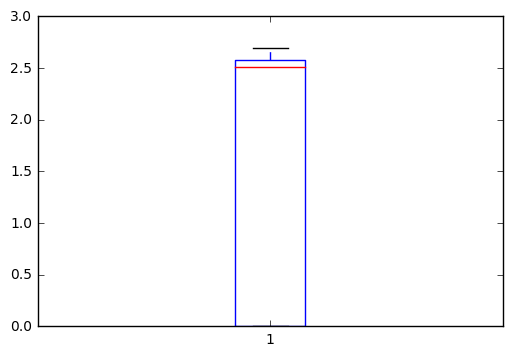

In [83]:
# Feature 2 - FIT101
print(np.mean(data['FIT101']))
print(np.std(data['FIT101']))
plt.boxplot(data['FIT101'])

602.9636852857083
114.311888621006


{'boxes': [<matplotlib.lines.Line2D at 0x12e1ea048>],
 'caps': [<matplotlib.lines.Line2D at 0x12e1fba58>,
 'fliers': [<matplotlib.lines.Line2D at 0x12e20dc50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12e20d438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12e1ea9e8>,
  <matplotlib.lines.Line2D at 0x12e1eab70>]}

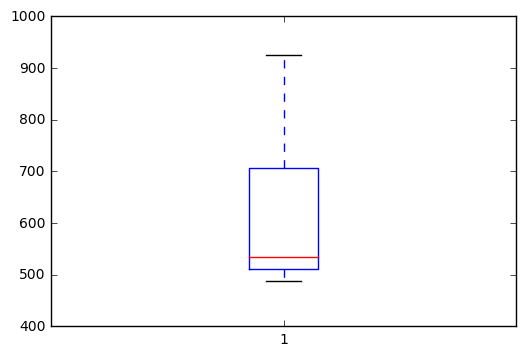

In [84]:
# Feature 3 - LIT101
print(np.mean(data['LIT101']))
print(np.std(data['LIT101']))
plt.boxplot(data['LIT101'])

In [86]:
# Feature 4 - MV101
data['MV101'].value_counts()

2    36742
1    13388
0      270
Name: MV101, dtype: int64

In [87]:
# Feature 5 - P101
data['P101'].value_counts()

2    37539
1    12861
Name: P101, dtype: int64

In [88]:
# Feature 6 - P102
data['P101'].value_counts()

2    37539
1    12861
Name: P101, dtype: int64

260.9736832639138
1.978092868075628


{'boxes': [<matplotlib.lines.Line2D at 0x131219c18>],
 'caps': [<matplotlib.lines.Line2D at 0x130875f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x1305b4ef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x130705f98>],
 'whiskers': [<matplotlib.lines.Line2D at 0x131219e48>,
  <matplotlib.lines.Line2D at 0x130875e10>]}

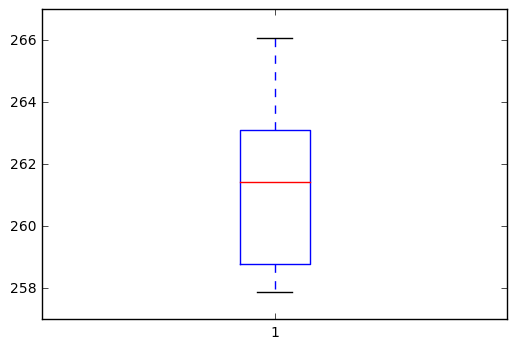

In [89]:
# Feature 7 - AIT201
print(np.mean(data['AIT201']))
print(np.std(data['AIT201']))
plt.boxplot(data['AIT201'])

8.379088168868124
0.15344895230063263


{'boxes': [<matplotlib.lines.Line2D at 0x11fbac2b0>],
 'caps': [<matplotlib.lines.Line2D at 0x11fb35cc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11faa1eb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11faa16a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11fbacc50>,
  <matplotlib.lines.Line2D at 0x11fbacdd8>]}

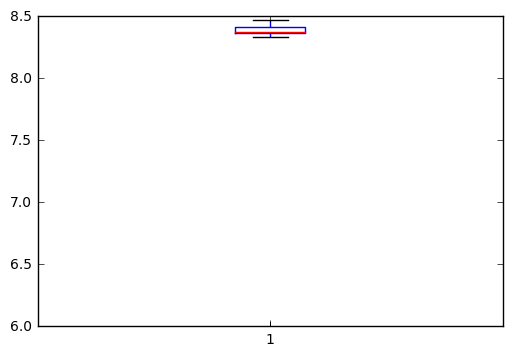

In [91]:
# Feature 8 - AIT202
print(np.mean(data['AIT202']))
print(np.std(data['AIT202']))
plt.boxplot(data['AIT202'])

327.91857679762614
5.345768817165642


{'boxes': [<matplotlib.lines.Line2D at 0x11eeda748>],
 'caps': [<matplotlib.lines.Line2D at 0x11ee7eac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x11ed0ea20>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11ed6ab38>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11eeda978>,
  <matplotlib.lines.Line2D at 0x11ee7e940>]}

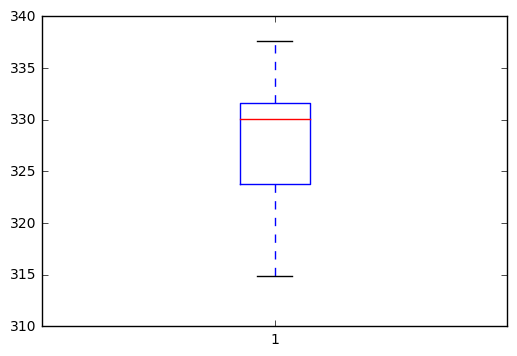

In [92]:
# Feature 9 - AIT203
print(np.mean(data['AIT203']))
print(np.std(data['AIT203']))
plt.boxplot(data['AIT203'])

1.8230930981339228
1.064382470123083


{'boxes': [<matplotlib.lines.Line2D at 0x11ffc8470>],
 'caps': [<matplotlib.lines.Line2D at 0x11fc05e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x11f505748>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11f90a860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11ffc8e10>,
  <matplotlib.lines.Line2D at 0x11ffc8f98>]}

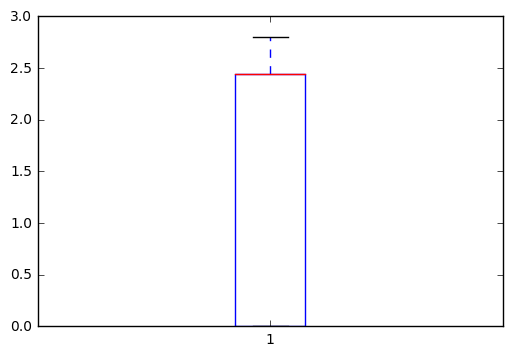

In [93]:
# Feature 10 - FIT201
print(np.mean(data['FIT201']))
print(np.std(data['FIT201']))
plt.boxplot(data['FIT201'])

In [94]:
# Feature 11 - MV201
data['MV201'].value_counts()

2    37570
1    12585
0      245
Name: MV201, dtype: int64

In [95]:
# Feature 12 - P201
data['P201'].value_counts()

1    50400
Name: P201, dtype: int64

In [96]:
# Feature 13 - P202
data['P202'].value_counts()

1    50400
Name: P202, dtype: int64

In [97]:
# Feature 14 - P203
data['P203'].value_counts()

2    37222
1    13178
Name: P203, dtype: int64

In [98]:
# Feature 15 - P204
data['P204'].value_counts()

1    50400
Name: P204, dtype: int64

In [99]:
# Feature 16 - P205
data['P205'].value_counts()

2    37420
1    12980
Name: P205, dtype: int64

In [100]:
# Feature 17 - P206
data['P206'].value_counts()

1    50400
Name: P206, dtype: int64